In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat

In [2]:
i = 0
lq = loadmat(f"test/test_{i}.mat")['data']
hq = loadmat(f"test/test_sr{i}.mat")['data']

In [3]:
lq = lq / lq.max()
hq = hq / hq.max()

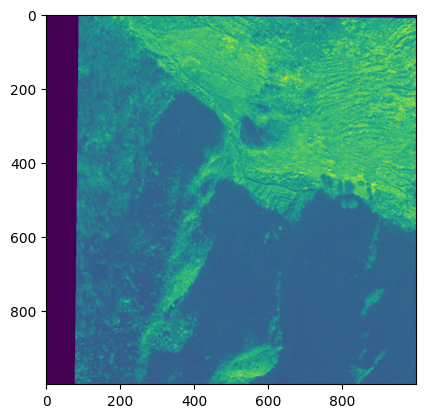

In [4]:
plt.imshow(lq)

In [6]:
hq.shape

(2000, 2000)